In [2]:
import numpy as np
import matplotlib.pyplot as plt

<h3>
1. Chaotic network (Sompolinsky, Crisanti, & Sommers (1988). Chaos in Random Neural Networks. Physical Review Letters)<br>
2. Ring attractor network (Ben Yishai et al. (1995). Theory of orientation tuning in visual cortex. PNAS)<br>
3. Rank 1 network (Mastrogiuseppe & Ostojic (2018). Linking Connectivity, Dynamics, and Computations in Low-Rank Recurrent Neural Networks. Neuron)<br>
4. Successor representation (Dayan (1993). Improving Generalization for Temporal Difference Learning: The Successor Representation. Neural Computation)
</h3>

## Dynamics

### $ \qquad \qquad \qquad \frac{dv_i}{dt} = -v_i + g \sum_j J_{ij} \tanh (v_j),  \qquad J_{ij} \sim \mathcal{N}(0,\frac{1}{N}) $   


In [3]:
# Number of neurons
N = 100

### Weight matrices

In [4]:
# Chaotic network 
W_chaos = np.random.randn(N,N) * np.sqrt(1/N)

# Ring attractor network 
th = np.linspace(0, 2 * np.pi, N, endpoint=False)   # Preferred firing location (angle)
J1 = 1.0
J0 = 0.5
W_ring = (J1 * np.cos(th[:, None] - th[None, :]) + J0) / N   # Synaptic weight matrix


# Rank 1 network 
u1 = np.random.rand(N)
u2 = np.random.rand(N)

W_rank1 = np.outer(u1,u2)


# Successor Representation
T = np.eye(N, k=1)
gamma = 0.98
W_sr = np.linalg.inv(np.eye(N) - gamma*T)


## All weight matrices

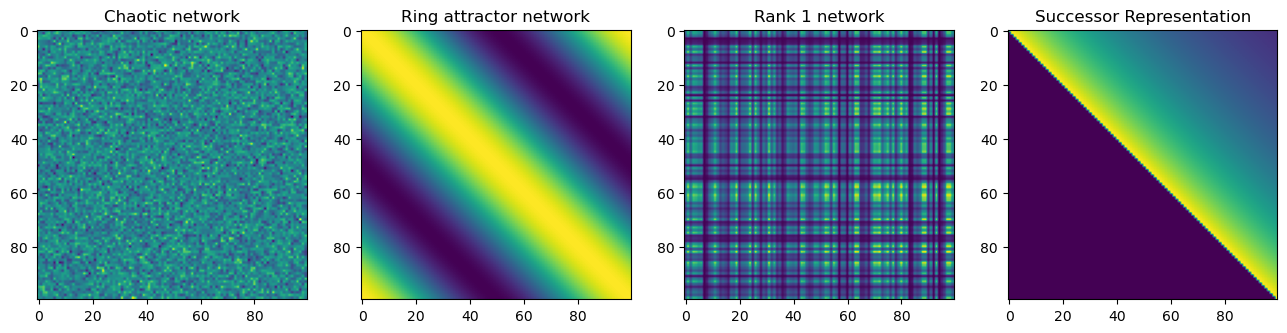

In [6]:
fig, ax = plt.subplots(1,4,figsize = (16,4))

ax[0].imshow(W_chaos)
ax[0].set_title('Chaotic network')

ax[1].imshow(W_ring)
ax[1].set_title('Ring attractor network')

ax[2].imshow(W_rank1)
ax[2].set_title('Rank 1 network')

ax[3].imshow(W_sr)
ax[3].set_title('Successor Representation')

plt.show()

In [7]:
def run_dynamics(v, J, g, tau, Iext, dt=0.1):
    N, T = v.shape

    for ii in range(T-1):
        v[:,ii+1] = v[:,ii] + (-v[:,ii] + g * J @ np.tanh(v[:,ii])+Iext[:,ii])*dt/tau

    return v

In [8]:
t = 1000
tau = 1
v = np.zeros((N,t))
v[:,0] = np.random.rand(N)

g = 7

Iext = np.zeros((N,t))

v = run_dynamics(v,W_chaos,g,tau,Iext)


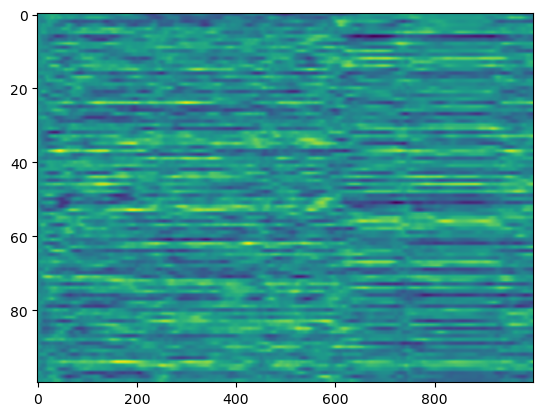

In [9]:
plt.imshow(v,aspect='auto')

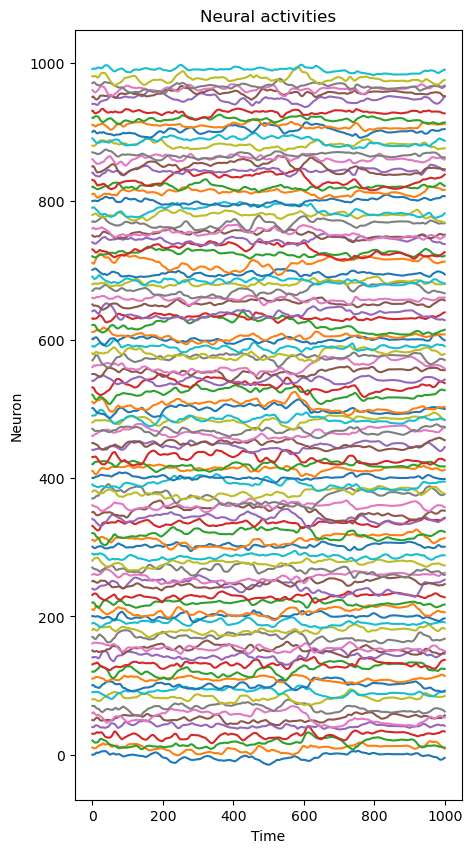

In [10]:
plt.subplots(figsize=(5,10))
plt.plot((v + 10 * np.arange(N)[:, None]).T)
plt.title('Neural activities')
plt.xlabel('Time')
plt.ylabel('Neuron')
plt.show()